In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error
%matplotlib inline

In [17]:
df1= pd.read_csv("austin_weather.csv")

In [18]:
df1.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [19]:
df1.drop(['Events', 'Date', 'SeaLevelPressureLowInches'], axis=1)

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureHighInches,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.86,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.41,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.56,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.56,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.41,30.33,10,10,7,10,2,16,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,103,89,75,71,67,61,82,54,25,30.04,29.97,10,10,10,12,5,21,0
1315,105,91,76,71,64,55,87,54,20,29.97,29.9,10,10,10,14,5,20,0
1316,107,92,77,72,64,55,82,51,19,29.91,29.86,10,10,10,12,4,17,0
1317,106,93,79,70,68,63,69,48,27,29.96,29.91,10,10,10,13,4,20,0


In [20]:
df1= df1.replace('T', 0.0)
df1= df1.replace('-', 0.0)
df1

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,0.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,


In [21]:
df1.to_csv('austin_weather_final.csv')

In [22]:
df2= pd.read_csv('austin_weather_final.csv')

In [24]:
y= y.values.reshape(-1,1)

In [25]:
day_index= 798
days= [i for i in range(y.size)]

In [34]:
from sklearn.linear_model import LinearRegression
numeric_cols = df2.select_dtypes(include=['float64', 'int64']).columns
df_numeric = df2[numeric_cols]

# Split the dataset into X and y
x= df_numeric.drop(['PrecipitationSumInches'], axis= 1)
y= df_numeric['PrecipitationSumInches']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=15)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [35]:
print("Model Accuracy:",reg.score(X_test, y_test))

Model Accuracy: 0.27272602358801545


Precipitation Trend Graph:


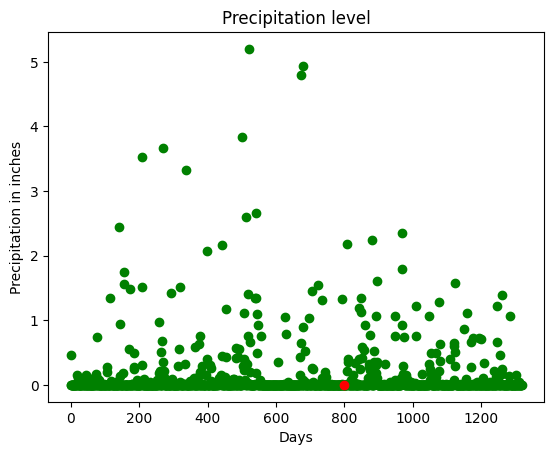

In [32]:
print("Precipitation Trend Graph:")
plt.scatter(days, y, color='g')
plt.scatter(days[day_index], y[day_index], color='r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
x_viz= x.filter(['TempAvgF', 'DewPointAvgF', 'HumidityHighPercent', 'SeaLevelPressureAvgInches', 'VisibilityHighMiles', 'WindAvgMPH'])

Precipitation vs Attributes Trend Graph:


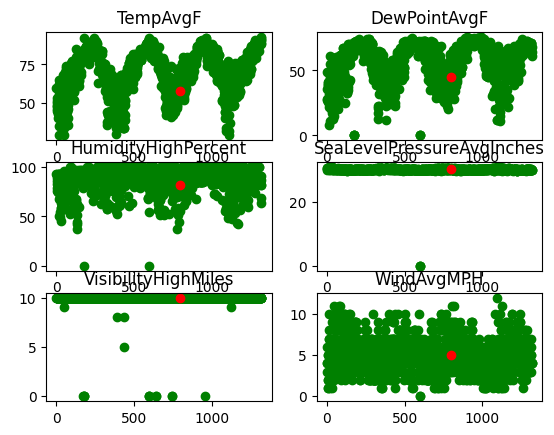

In [33]:
print("Precipitation vs Attributes Trend Graph:")
for i in range(x_viz.columns.size):
    plt.subplot(3,2, i+1)
    plt.scatter(days, x_viz[x_viz.columns.values[i][:100]], color= 'g')
    plt.scatter(days[day_index], x_viz[x_viz.columns.values[i]][day_index], color= 'r')
    plt.title(x_viz.columns.values[i])